# by: Abdulrahman Saeed

## CENSUS INCOME CATEGORY PREDICTION
• Build a Decision Tree model with the dataset. free to do any kind of EDA (using all statistical tools and methodology) as per choice and play around with the data. Following are the must have things for submission of project :

    ♦ Proper EDA with explanation of impactful and useful variables
    ♦ Graphs wherever necessary
    ♦ Metrics for model evaluation:
            ♦ Confusion Matrix
            ♦ Accuracy Score
            ♦ F1 score, Precision, Recall, ROC-AUC 
            ♦ Model Optimization using K fold cross validation

• Consider column O (income) as the target (y) variable and rest of the columns as feature variables

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Basic Information of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Checking Missing Values

In [4]:
df.isna().any().sum()

0

Insight : There are no missing values.
    
##### Note : But we know that missing values are present in the form of "?" which needs to be preprocessed.

### Summary statistics

In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Exploratory Data Analysis

### Checking Distribution of Income

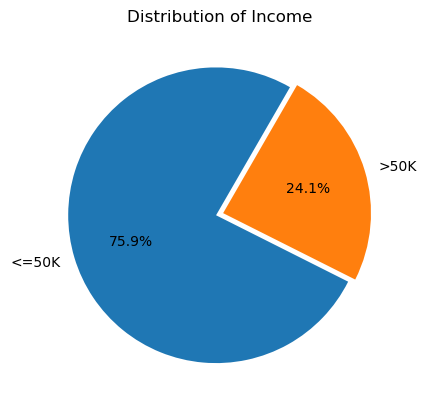

In [6]:
plt.pie(df.income.value_counts(),explode=(0.025,0.025), labels=df.income.value_counts().index, autopct='%1.1f%%', startangle=60)
plt.title("Distribution of Income")
plt.show()

Insight : The dependent feature 'income' contains 75.9% values have income less than 50K and 24.1% values have income more than 50K. So it's clear that the dataset is not balanced.

In [7]:
def plot_stacked_bars(x_axis, title_, xlabel_, rot_=0):
    """
    Plot stacked bars with annotations
    """
    plt.figure(figsize=[20,8])
    sns.countplot(data=df, x=x_axis, hue='income')
    plt.title(title_, fontsize=20)
    plt.xlabel(xlabel_, fontsize=15)
    plt.ylabel('Number of people', fontsize=15)
    plt.tick_params(labelsize=15)
    plt.legend(prop={'size': 15})
    plt.xticks(rotation = rot_)
    plt.show()

### Checking Workclass Distribution

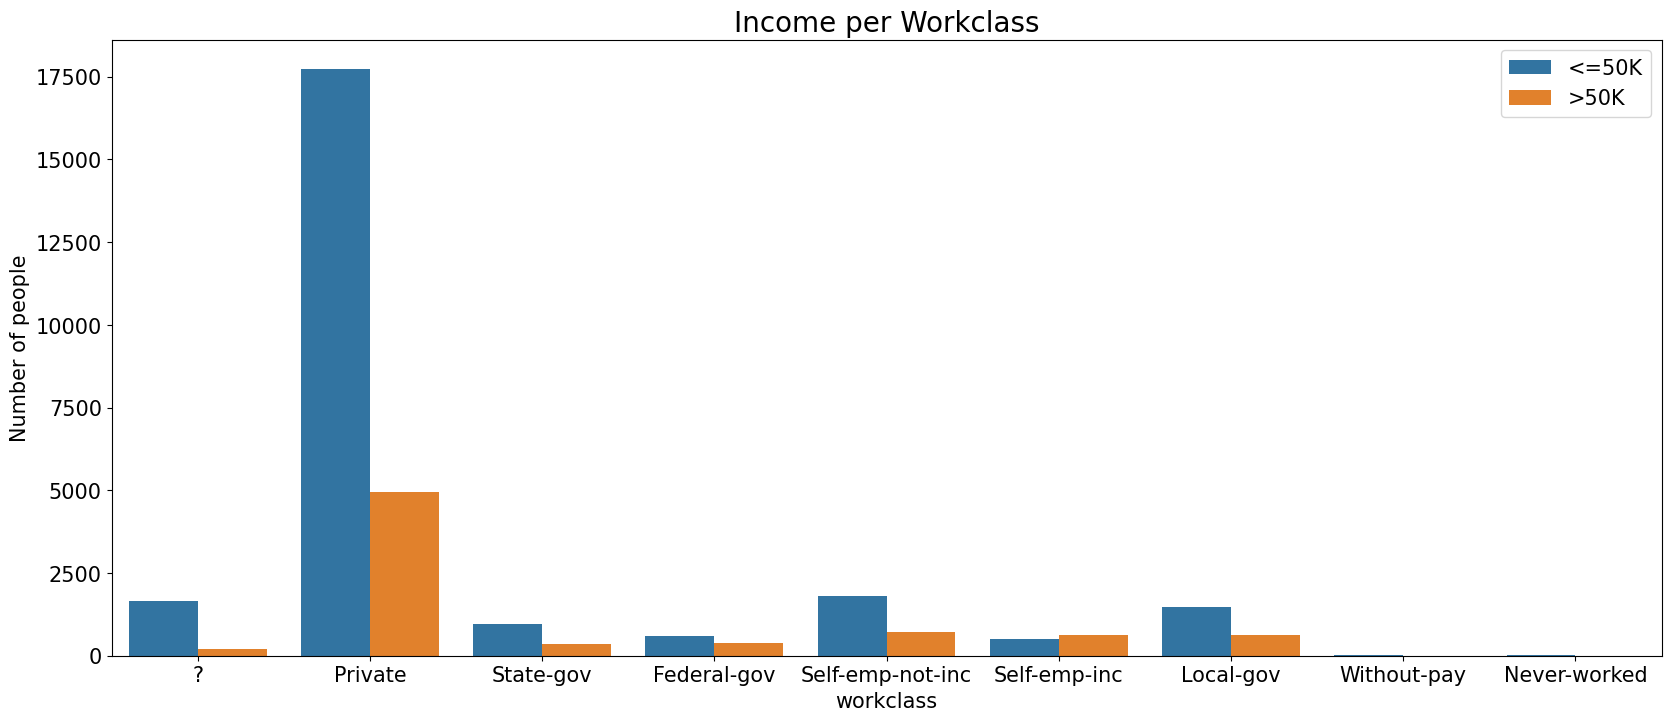

In [8]:
plot_stacked_bars('workclass', 'Income per Workclass', 'workclass')

##### Insight :
    
   ♦ Data say most number of people are working in private sector.
   
   ♦ As we can see the plot that who have an annual income is more than 50K or less than 50K are work in private sector.

### Checking education Distribution

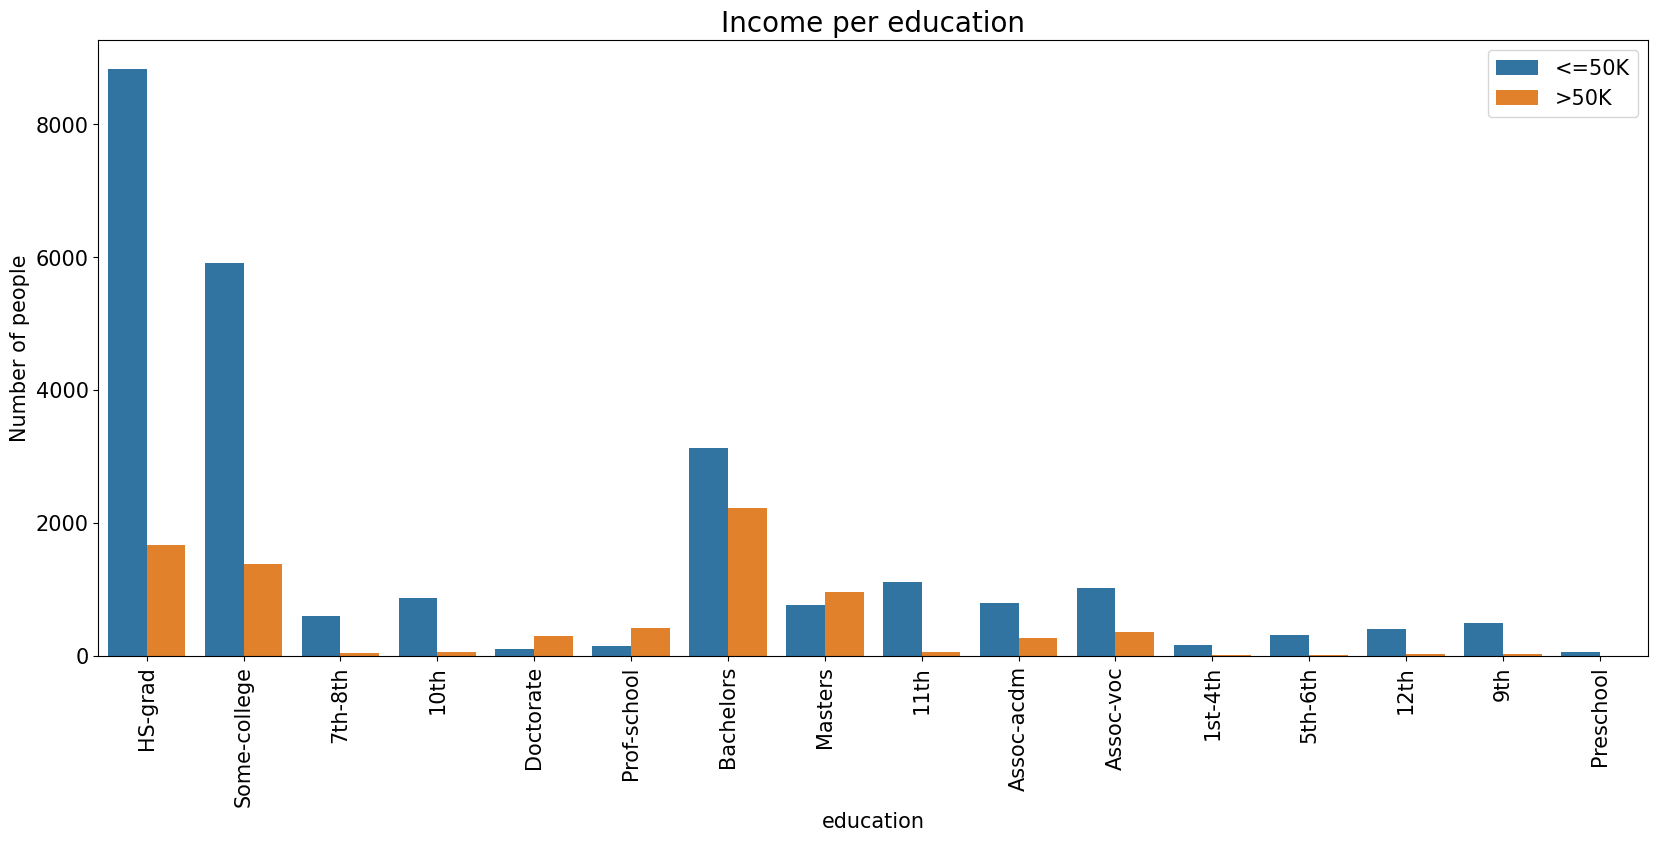

In [9]:
plot_stacked_bars('education', 'Income per education', 'education', 90)

##### Insight :
    
   ♦ We can see most number of people are high school graduates.
   
   ♦ As we can see the plot that who have an annual income is more than 50K or less than 50K are Bachelors.

### Checking Maritial Status Distribution


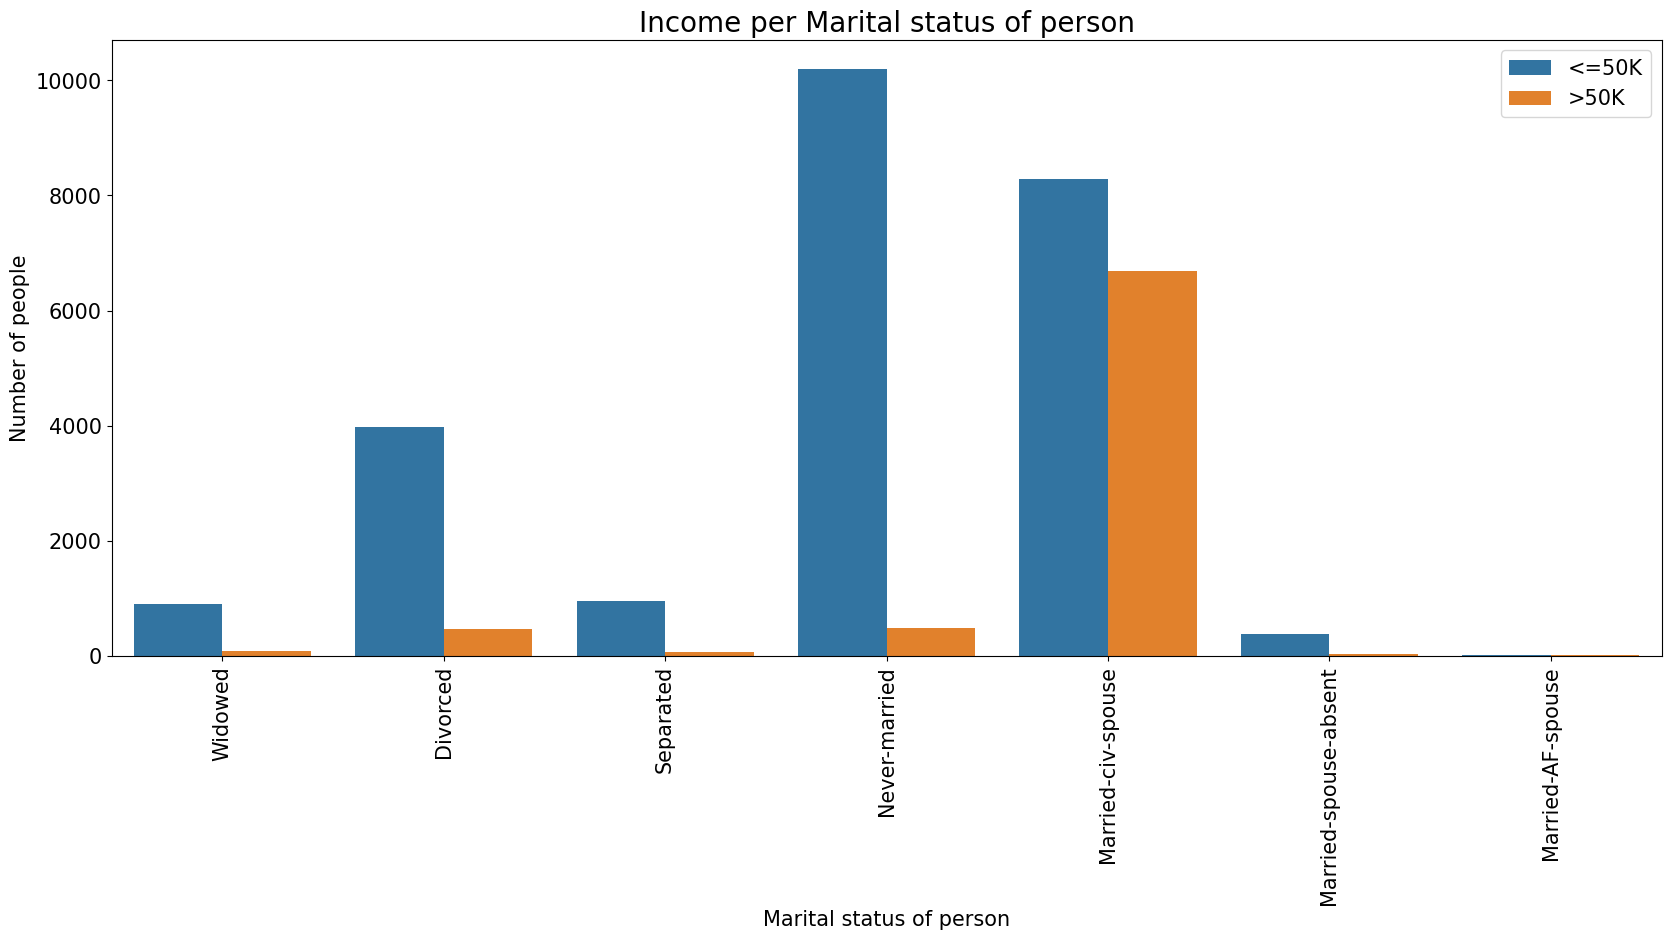

In [10]:
plot_stacked_bars('marital.status', 'Income per Marital status of person', 'Marital status of person', 90)

##### Insight :
    
   ♦ Most of the people whose annual income is more than 50K and they are married person.

### Checking occupation Distribution


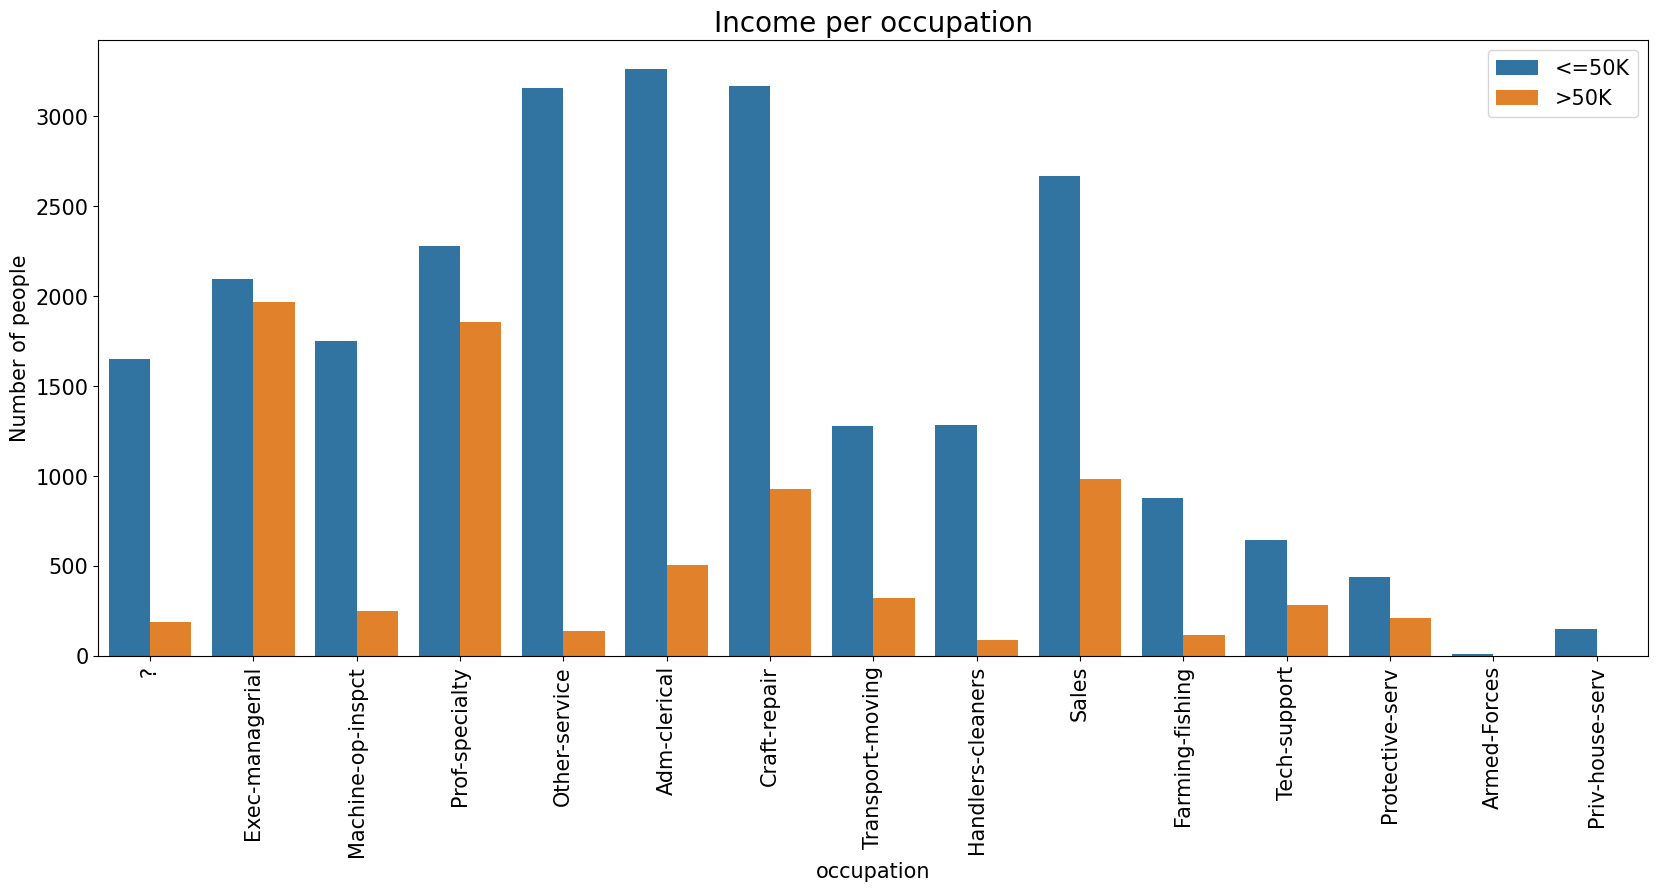

In [11]:
plot_stacked_bars('occupation', 'Income per occupation', 'occupation', 90)

• In occupation column the values are well distributed in all categories.

### Checking relationship Distribution

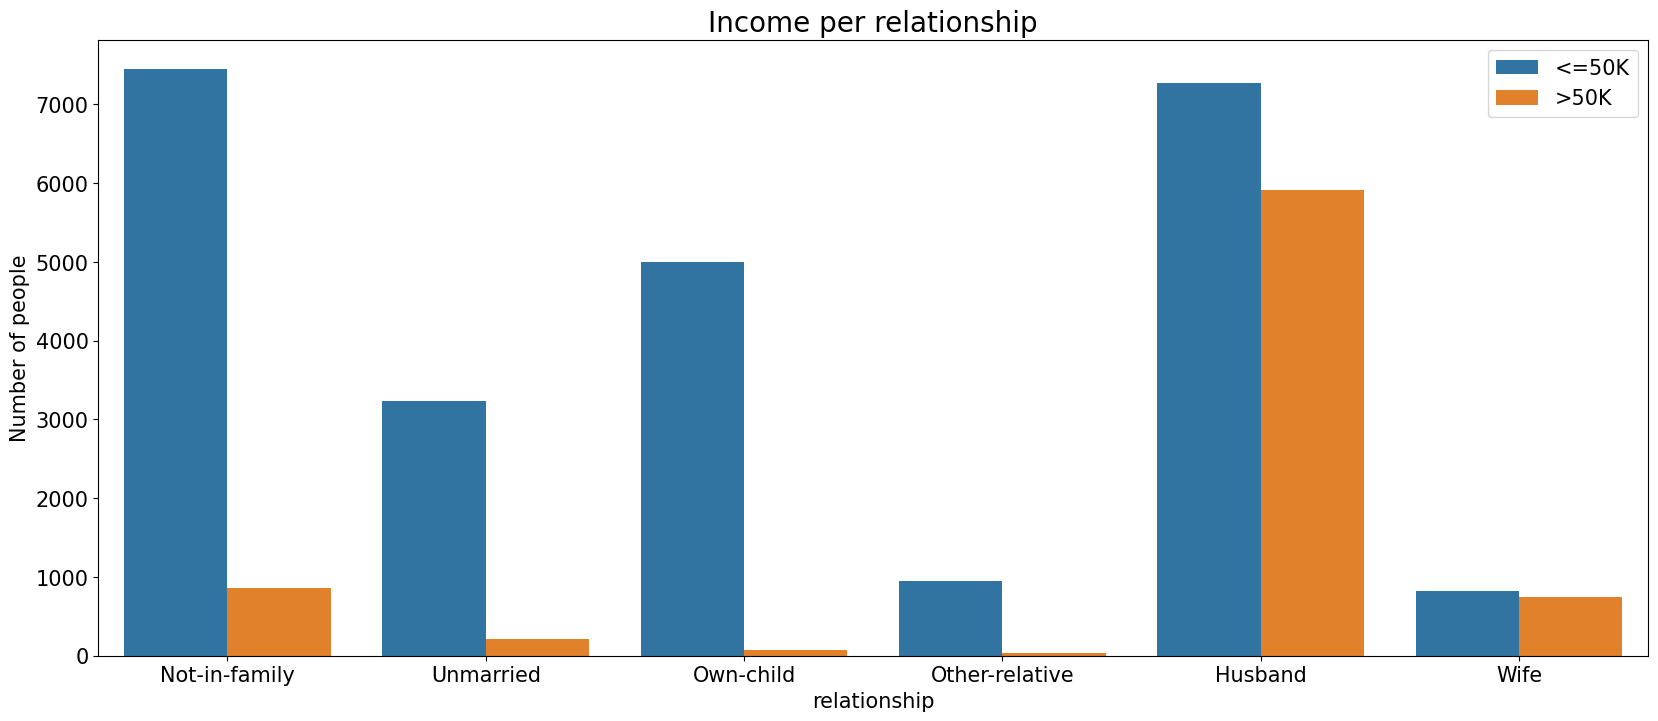

In [12]:
plot_stacked_bars('relationship', 'Income per relationship', 'relationship')

. As we can see the plot that who have an annual income is more than 50K or less than 50K are Husband.

### Checking race Distribution

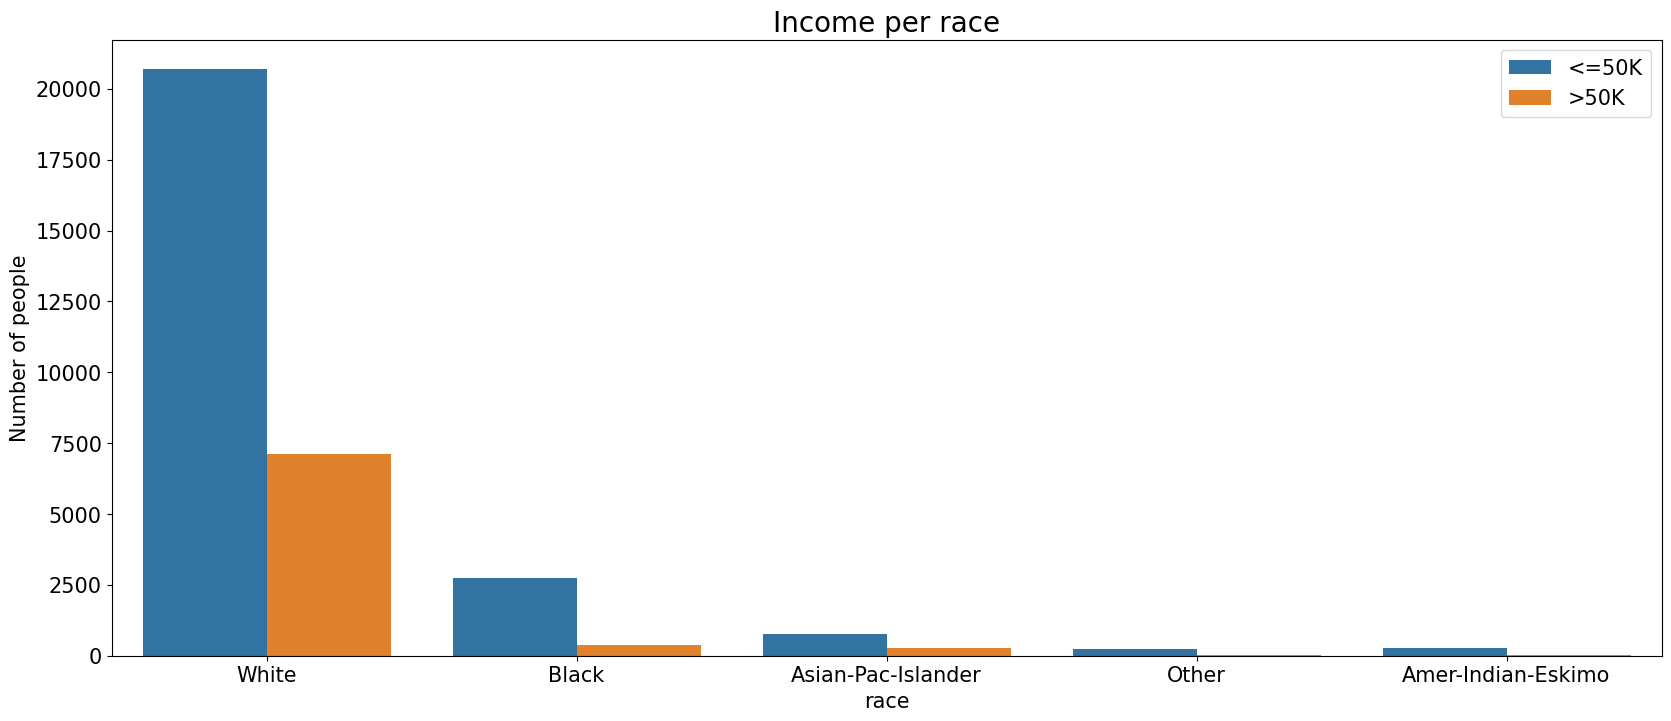

In [13]:
plot_stacked_bars('race', 'Income per race', 'race')

##### Insight :
    
    ♦ As we saw is that majority of information about white race is more while all other races are lesser.

### Checking sex Distribution

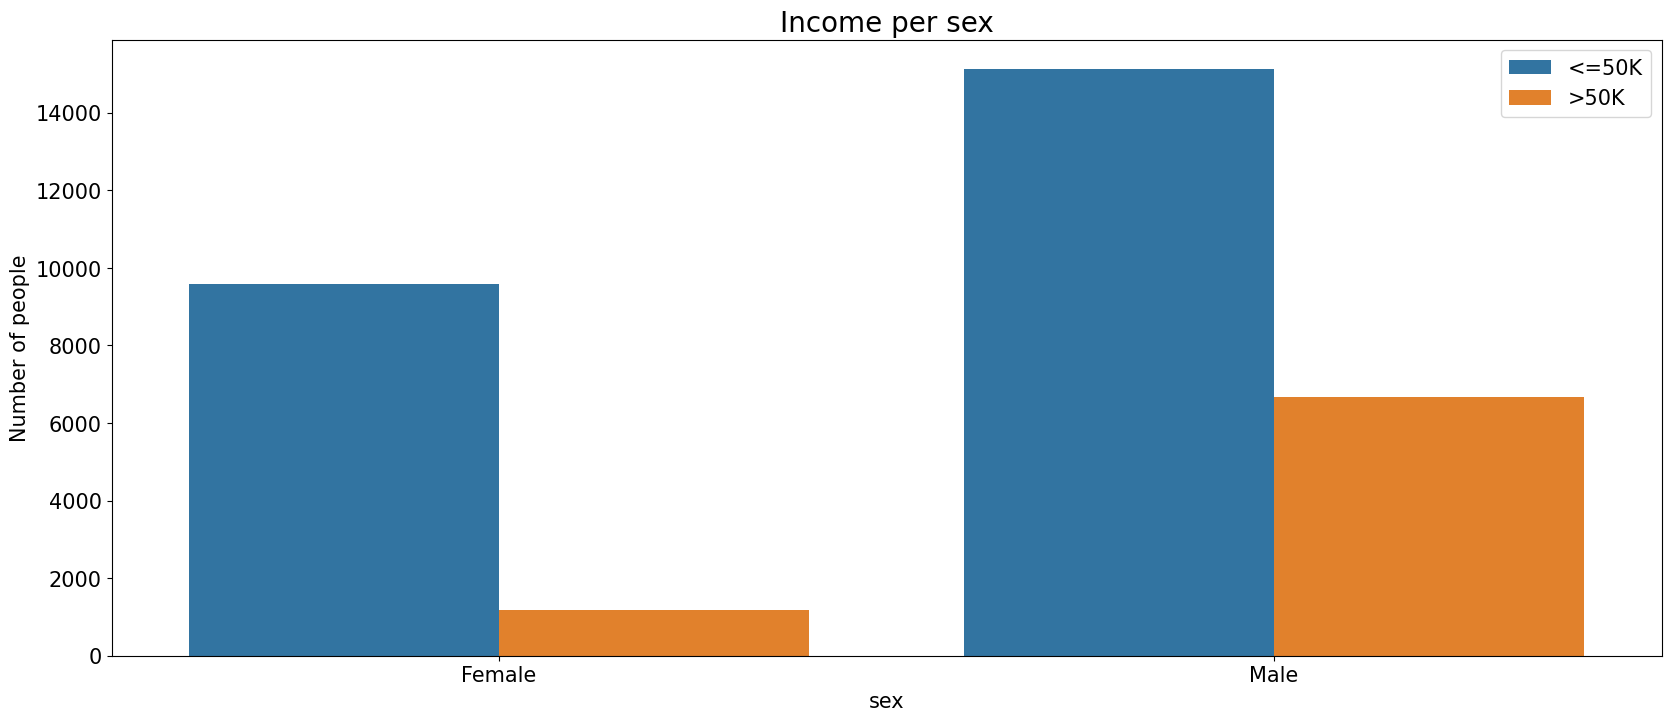

In [14]:
plot_stacked_bars('sex', 'Income per sex', 'sex')

Insight :
    
    ♦ The number of male candidates are more than female candidates.
    
    ♦ When comparing Male and Female, more percentage of male candidates are earn more than 50K.

### Checking Country wise Income

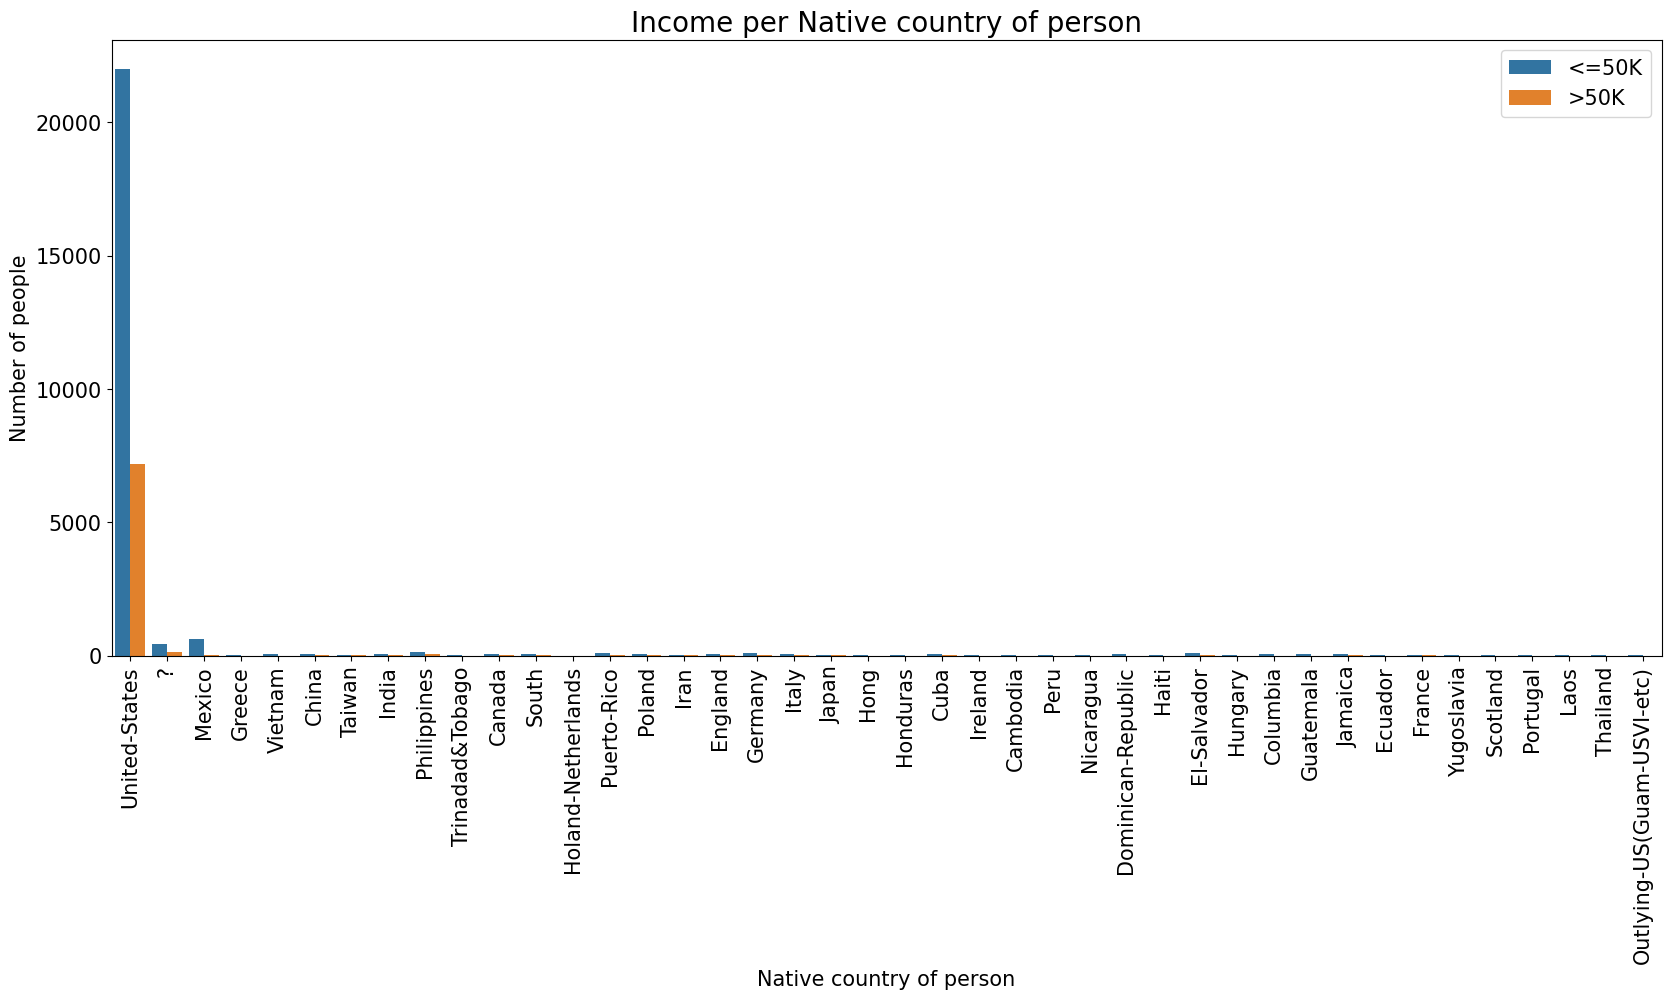

In [15]:
plot_stacked_bars('native.country', 'Income per Native country of person', 'Native country of person', 90)

##### Insight :
    
    ♦ We can see that 89.59% people are from United States and only 10.41% people from other countries.

### Checking Distribution for 'Age'

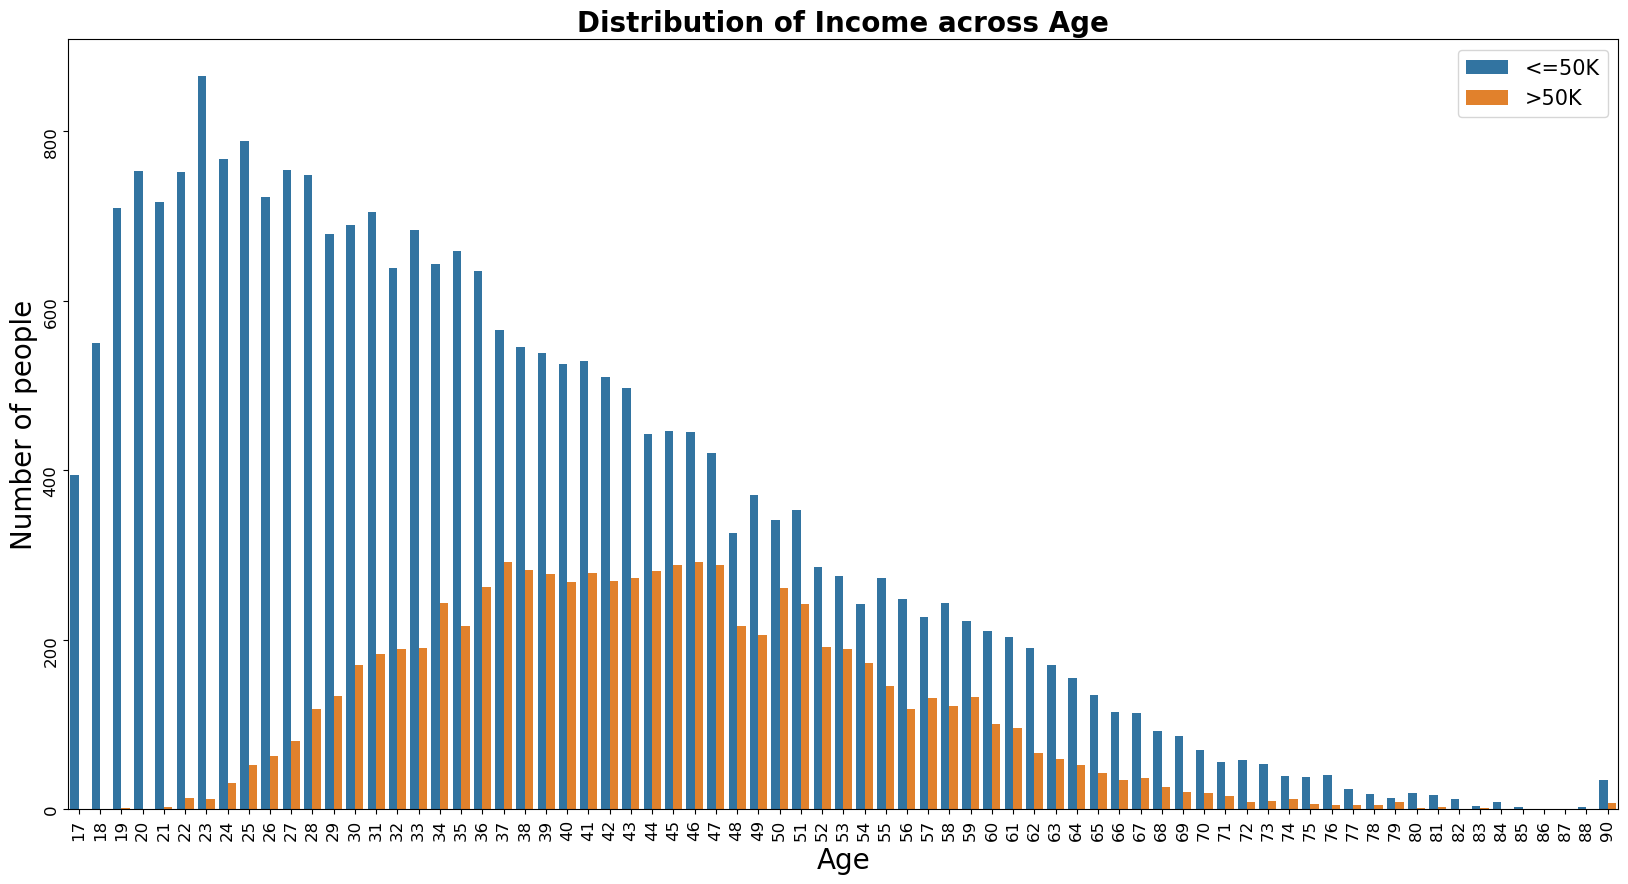

In [16]:
plt.figure(figsize=[20,10])
sns.countplot(data=df, x='age', hue='income')
plt.title('Distribution of Income across Age', fontsize = 20, fontweight='bold')
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Number of people', fontsize = 20)
plt.tick_params(labelsize=12, rotation=90)
plt.legend(prop={'size': 15})
plt.show()

On taking a look at the result of distribution plot for "age" column, I can see that the most of people are young who have income more than 50K

## numeric fields distribution

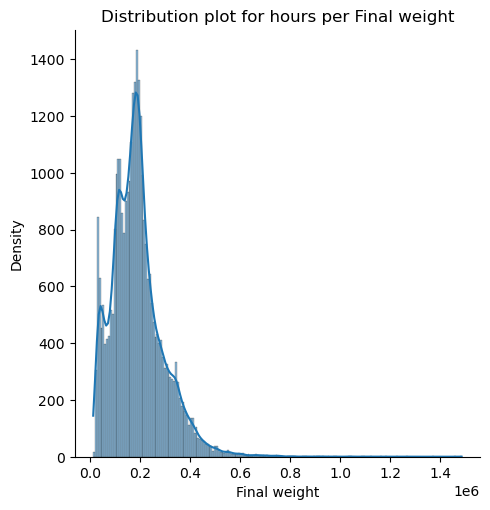

In [17]:
sns.displot(data=df, x='fnlwgt', kde=True)
plt.title('Distribution plot for hours per Final weight')
plt.xlabel('Final weight')
plt.ylabel('Density')
plt.show()

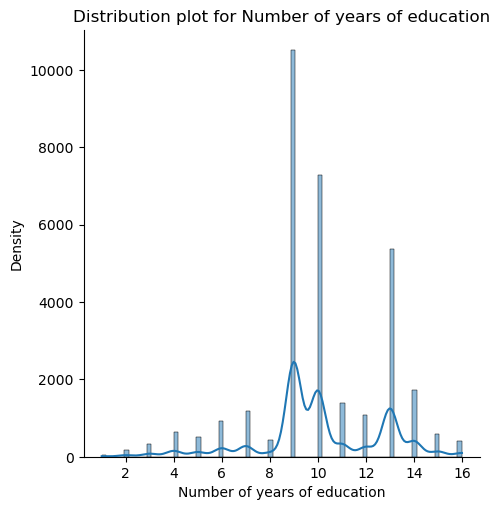

In [18]:
sns.displot(data=df, x='education.num', kde=True)
plt.title('Distribution plot for Number of years of education')
plt.xlabel('Number of years of education')
plt.ylabel('Density')
plt.show()

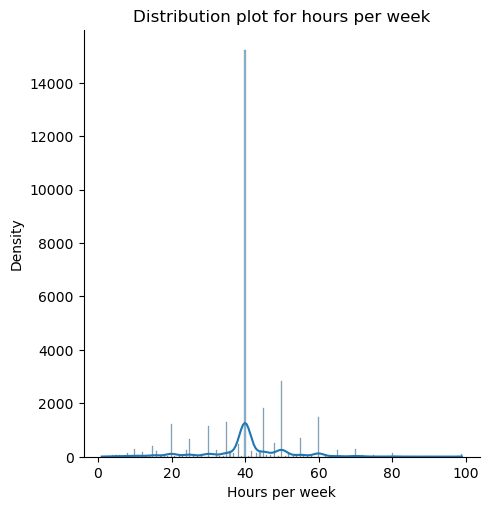

In [19]:
sns.displot(data=df, x='hours.per.week', kde=True)
plt.title('Distribution plot for hours per week')
plt.xlabel('Hours per week')
plt.ylabel('Density')
plt.show()

   •♦• The consumption data is clearly significantly positively skewed and has a very long right tail toward the upper values of the distribution. Outliers are most likely to be found in the values at the upper and lower ends of the distribution. To see the outliers more clearly, we might employ a common plot. A boxplot is a common visual representation of the distribution using a five-number summary as the basis:

                                                    ♦ Minimum
                                                    ♦ First quartile (Q1)
                                                    ♦ Median
                                                    ♦ Third quartile (Q3)
                                                    ♦ Maximum
                                                    
        •♦• It can uncover anomalies and their values. Additionally, it can reveal the degree to which our data is grouped, symmetrical, and skewed.

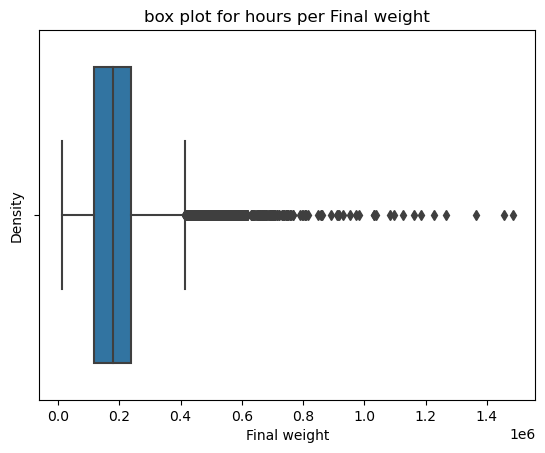

In [20]:
sns.boxplot(data=df, x='fnlwgt')
plt.title('box plot for hours per Final weight')
plt.xlabel('Final weight')
plt.ylabel('Density')
plt.show()

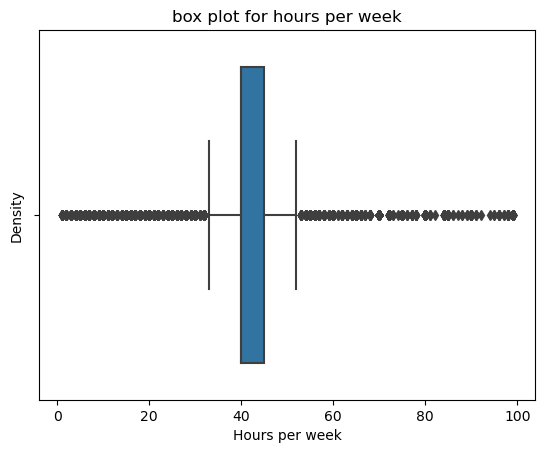

In [21]:
sns.boxplot(data=df, x='hours.per.week')
plt.title('box plot for hours per week')
plt.xlabel('Hours per week')
plt.ylabel('Density')
plt.show()

### Checking Correlation

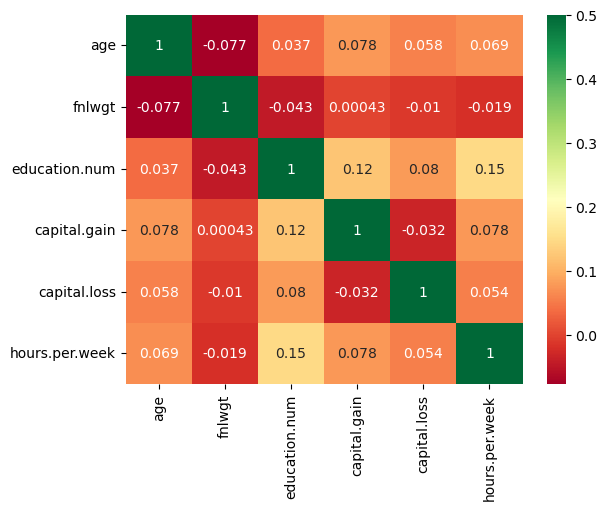

In [22]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', vmax=.5)
plt.show()

#### Insight :
we can see that the target variable 'income' is highly correlated with age, capital gain and number of hours per week.

### Data Preprocessing

As we know that missing values are present in the form of "?" which needs to be preprocessed.

In [23]:
df.replace('?', np.nan, inplace=True)

In [24]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [25]:
nan_columns = ['workclass', 'occupation', 'native.country']
for col in nan_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

## Feature engineering

In [26]:
df.drop('education.num', axis=1, inplace=True)

In [27]:
# Leaky Feature
index = df[df['native.country']=='Holand-Netherlands'].index
df.drop(index=index, inplace=True)

### Label Encoding

In [28]:
encoder= LabelEncoder()

In [29]:
cols = df.select_dtypes('object')
for col in cols:
        df[col] = encoder.fit_transform(df[col])

In [30]:
df.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,6,9,1,4,0,0,4356,40,37,0
1,82,3,132870,11,6,3,1,4,0,0,4356,18,37,0
2,66,3,186061,15,6,9,4,2,0,0,4356,40,37,0
3,54,3,140359,5,0,6,4,4,0,0,3900,40,37,0
4,41,3,264663,15,5,9,3,4,0,0,3900,40,37,0


### Feature Selection

In [31]:
X = df.drop('income', axis=1)
y = df['income']

In [32]:
scaler = StandardScaler()
X[['age', 'capital.gain', 'capital.loss', 'hours.per.week']] = scaler.fit_transform(X[['age', 'capital.gain', 'capital.loss', 'hours.per.week']])

In [33]:
rd_over_sample = RandomOverSampler()
X_sampled, y_sampled = rd_over_sample.fit_resample(X, y)

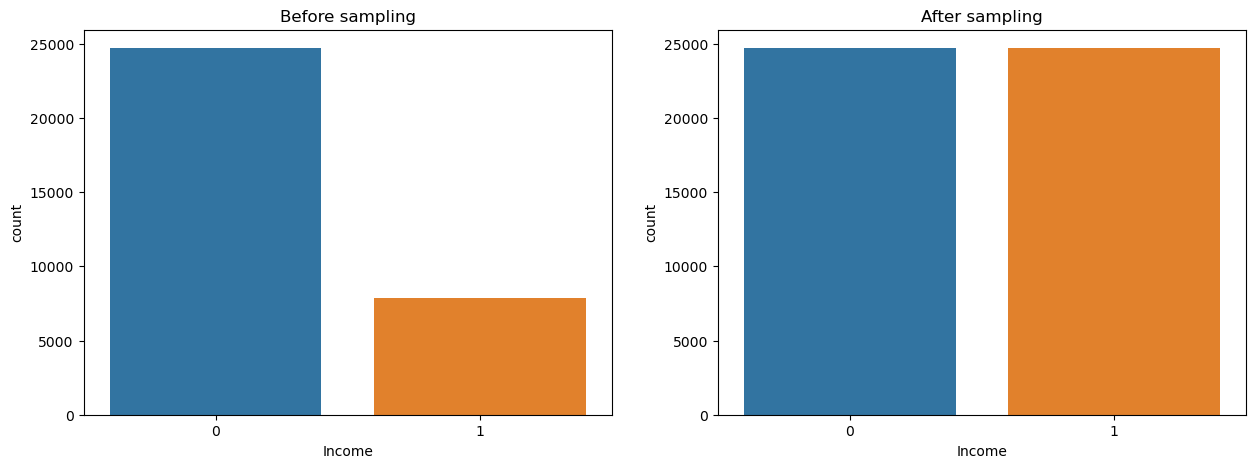

In [34]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(data=df, x='income')
plt.title('Before sampling')
plt.xlabel('Income')

# Plot After sampling
plt.subplot(1,2,2)
sns.countplot(x=y_sampled)
plt.title('After sampling')
plt.xlabel('Income')
plt.show()

### Splitting into Training and Testing Data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=.2, random_state=42)

In [36]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (39550, 13)
X_test shape: (9888, 13)
y_train shape: (39550,)
y_test shape: (9888,)


### Decision Tree Classifier model

In [37]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [38]:
model.score(X_test, y_test)

0.9166666666666666

In [39]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [40]:
mean_absolute_error(y_pred, y_test)

0.08333333333333333

<Axes: >

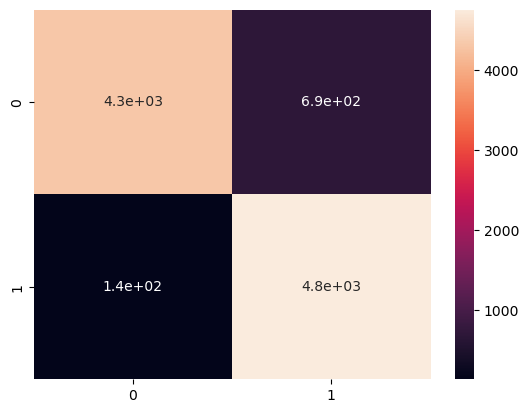

In [41]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

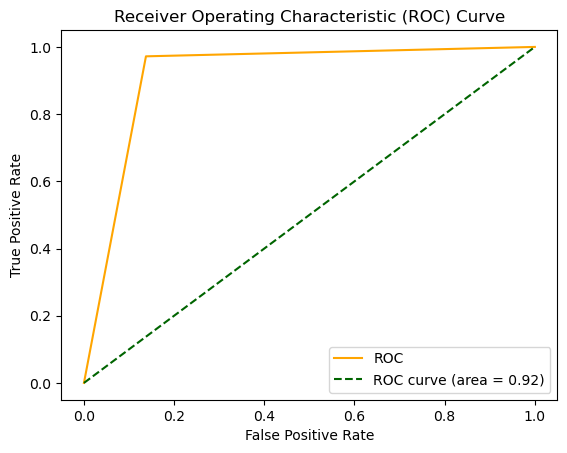

In [42]:
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkgreen', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [43]:
feature_importances = model.feature_importances_

In [44]:
feature_importances = pd.DataFrame({
    'features' : X_train.columns, 
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True)

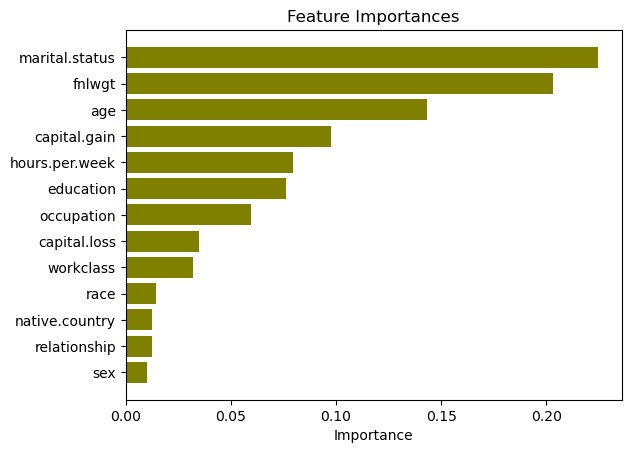

In [45]:
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='olive', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.show()

# Conclusion :
    
   ♦ So I used Decision Tree Classifier Model for prediction and I got Accuracy score of 0.91 and 0.91 AUC score.
    
   ♦ Used multiple Performance metrics to ensure that the model is performing correctly and is not overfitting on the data.
    
   ♦ In this dataset I found out that most number of people, Who had been earning more than $50K, they were working in private sector.
    
   ♦ While doing exploratory analysis, I found out that the most number of people are young. But relatively less young people who have an annual income is more than $50K.
    
   ♦ In this dataset the most number of people are Young, White race, Male, High school graduates with 9 to 10 years of education, Work approximately 30-40 hours per week and mostly they are from United States of America.